#Machine Learning - Regression
##Final Project
###Rhichard Koh

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import uniform
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
def stepwiseReg(data):
    null = LinearRegression().fit(data[['V1']], data['y'])
    full = LinearRegression().fit(data.drop(columns=['y']), data['y'])
    features = list(data.drop(columns=['y']).columns)
    selector = RFE(full, n_features_to_select=1, step=1, verbose=0)
    stepF = selector.fit(data.drop(columns=['y']), data['y'])
    return stepF

def get_random_vec(N=100, x_name="x", min=-1, max=1):
    return uniform(min, max).rvs(size=N)

def get_randomwalk_vec(N=100, x_name="x", min=-1, max=1):
    x_ = 0
    v = []
    for i in range(N):
        x_ += uniform(min, max).rvs()
        v.append(x_)
    return v

def simulate(N=100, k=10, M=10):
    df = pd.DataFrame(np.arange(1, N+1), columns=["V1"])
    for i in range(1, k+M+1):
        df[f'V{i+1}'] = get_random_vec(N, min=-2.5, max=2.5)
    vars = df.columns[1:]
    features = np.random.choice(vars, k, replace=True)
    weights = np.random.uniform(-5, 5, size=k)
    intercept = np.random.uniform(5, 50, size=1)
    X = df[features]
    noise = np.random.uniform(-1, 1, size=N)
    y = np.dot(X, weights) + intercept + noise
    df['y'] = y
    bound = int(np.floor(N/2))
    df = df.sample(frac=1).reset_index(drop=True) # shuffle
    df_train = df.iloc[:bound] # get training set
    df_test = df.iloc[bound:] # get test set
    m = LinearRegression()
    selector = RFE(m, n_features_to_select=k, step=1)
    selector.fit(df_train[features], df_train['y'])
    est_coefs = np.array(features)[selector.support_]
    r = len(set(est_coefs).intersection(features)) / len(est_coefs)
    sse = np.sum((selector.predict(df_test[features]) - df_test['y'])**2)
    return (round(r, 2), round(sse, 2))

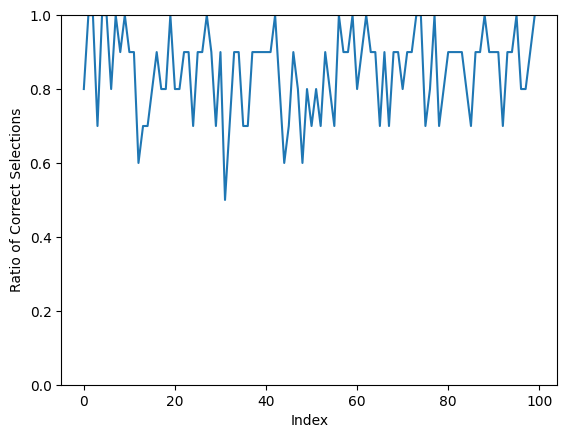

In [ ]:
# Play
runs_count = 100
df_results = pd.DataFrame(columns=['rcs', 'sse'])
for i in range(runs_count):
    df_results.loc[i] = simulate(N=200, k=10, M=20)
df_results['rcs'].plot(ylim=[0,1], xlabel='Index', ylabel='Ratio of Correct Selections')
plt.show()

We can see that the ratio fluctuates greatly therefore stepwise regression has a very high varience and only if you're lucky you get to pick the correct selections.

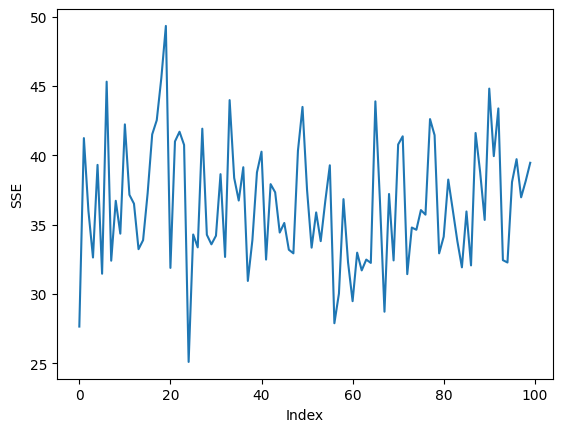

In [ ]:
df_results['sse'].plot(xlabel='Index',ylabel='SSE')
plt.show()

We can observe that the SSE sometimes could be very high and a few times very low, this is another reason why we should step away from step wise regression for feature selection.

**References**:

Step away from stepwise

https://journalofbigdata.springeropen.com/articles/10.1186/s40537-018-0143-6

R implementation

https://rpubs.com/uzair/stepwise-regression-simulation